In [32]:
import multiprocessing
import pandas as pd
import numpy as np

from keras.preprocessing.text import text_to_word_sequence

In [46]:
from keras.preprocessing.text import text_to_word_sequence

stop_words = pd.read_csv('../data/stopwords.csv')['words'].values
stop_words.append(['wisdom'])

def remove_stop_words(text):
    word_tokens = text_to_word_sequence(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return ' '.join(filtered_sentence)

print(stop_words)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [34]:
sentences = [
    'the king is a man of wisdom',
    'the queen is a woman of beauty',
    'the king is royal',
    'the queen is royal',
    'the royal family is mighty',
]

In [35]:
corpus = [text_to_word_sequence(y) for y in [remove_stop_words(x) for x in sentences]]
    
corpus

[['king', 'man', 'wisdom'],
 ['queen', 'woman', 'beauty'],
 ['king', 'royal'],
 ['queen', 'royal'],
 ['royal', 'family', 'mighty']]

In [36]:
vector_size = 3

In [37]:
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

word2vec = Word2Vec(sentences=corpus,
                    size=vector_size, 
                    window=1, 
                    negative=2,
                    iter=500,
                    seed=1000,
                    min_count=1,
                    workers=multiprocessing.cpu_count())

vecs_x = word2vec.wv

In [38]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

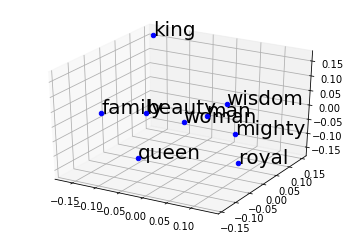

<Figure size 72x72 with 0 Axes>

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for word in vecs_x.vocab:
    x = vecs_x[word][0]
    y = vecs_x[word][1]    
    z = vecs_x[word][2]
    
    ax.scatter(x, y, z, color='b')
    ax.text(x, y, z, '%s' % (word), size=20, zorder=1, color='k')
    
plt.figure(figsize=(1,1))


# for angle in range(0, 360):

#     ax.view_init(30, angle)
plt.draw()
#     plt.pause(.001)

In [45]:
!git add *
!git commit -m "yay"
!git push -u origin master

[master cb3408d] yay
 2 files changed, 6910 insertions(+)
 create mode 100644 word-embeddings/.ipynb_checkpoints/Word2Vec-checkpoint.ipynb
 create mode 100644 word-embeddings/Word2Vec.ipynb
Branch 'master' set up to track remote branch 'master' from 'origin'.


To https://github.com/mikedelcastillo/cs129.18-project.git
   a39a30c..cb3408d  master -> master
